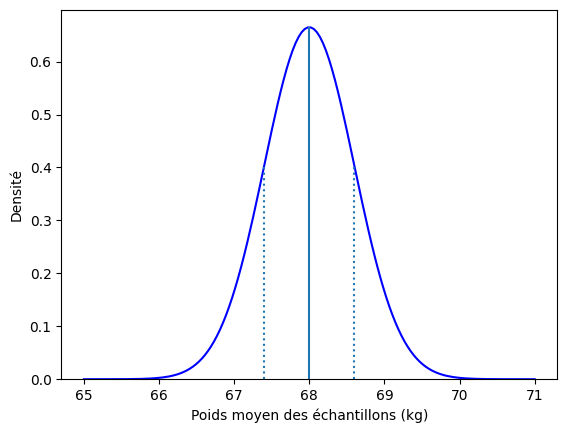

In [108]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)

mu = 68
sigma = 3

taille_echantillon = 25

sigma_echantillon_non_exhaustif = sigma/math.sqrt(taille_echantillon)

def distr_poids_echantillon(x):
    return norm.pdf((x['poids']-mu)/sigma_echantillon_non_exhaustif)/sigma_echantillon_non_exhaustif

fac = 5
poids_min = mu - fac*sigma_echantillon_non_exhaustif
poids_max = mu + fac*sigma_echantillon_non_exhaustif

distribution_echantillon_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

# Combien d'échantillons pour une moyenne comprise entre 66.8 et 68.3 kg

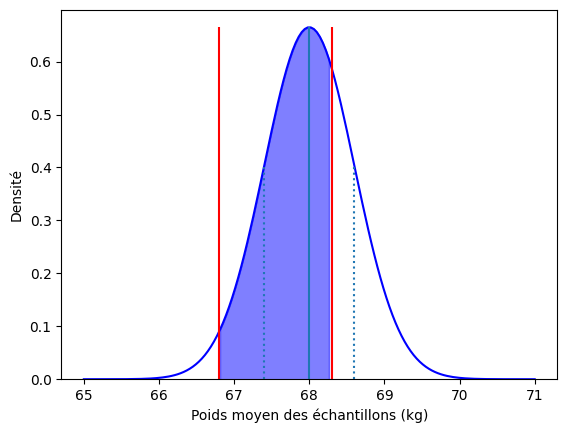

In [109]:
poids_min = 66.8
poids_max = 68.3

plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[(distribution_echantillon_df['poids']>=poids_min)&(distribution_echantillon_df['poids']<=poids_max)]
plt.fill_between(sub_df['poids'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.vlines(poids_min,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif, color='red')
plt.vlines(poids_max,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif, color='red')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [110]:
aire = (norm.cdf(poids_max,mu,sigma_echantillon_non_exhaustif)-norm.cdf(poids_min,mu,sigma_echantillon_non_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [{},{}]'.format(aire*100,poids_min,poids_max))
print('et donc pour 80 tirages, on devrait en obtenir {} avec une moyenne qui tombe dans l\'intervalle [{},{}]'.format(int(round(80*aire)),poids_min,poids_max))

Aire bleue sous la courbe:0.6687
ou encore 66.87% de chance que la moyenne d'échantillon tombe dans l'intervalle [66.8,68.3]
et donc pour 80 tirages, on devrait en obtenir 53 avec une moyenne qui tombe dans l'intervalle [66.8,68.3]


In [111]:
N = 3000
population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})

n_echantillons = 80

moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

n_OK = 0
for poids in poids_moyen_df['poids_moyen']:
    if (poids>=poids_min)&(poids<=poids_max):
        n_OK += 1
print('n_OK:{} dans l\'intervalle [{},{}]'.format(n_OK,poids_min,poids_max))

n_OK:56 dans l'intervalle [66.8,68.3]


# Moyenne inférieure à 66.4kg

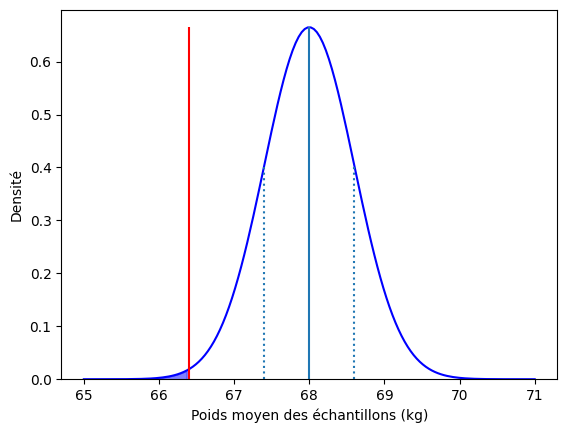

In [112]:
poids_max = 66.4

plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[distribution_echantillon_df['poids']<=poids_max]
plt.fill_between(sub_df['poids'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.vlines(poids_max,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif, color='red')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [113]:
aire = (norm.cdf(poids_max,mu,sigma_echantillon_non_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [<-,{}]'.format(aire*100,poids_max))
print('ou encore {:.2f} échantillon de poids moyen inférieur à {} kg sur {} tirages'.format(aire*n_echantillons, poids_max, n_echantillons))
print('et donc pour 80 tirages, on devrait en obtenir {} avec une moyenne qui tombe dans l\'intervalle [<-,{}]'.format(int(round(80*aire)),poids_max))

Aire bleue sous la courbe:0.0038
ou encore 0.38% de chance que la moyenne d'échantillon tombe dans l'intervalle [<-,66.4]
ou encore 0.31 échantillon de poids moyen inférieur à 66.4 kg sur 80 tirages
et donc pour 80 tirages, on devrait en obtenir 0 avec une moyenne qui tombe dans l'intervalle [<-,66.4]


In [130]:
N = 3000
population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})

n_echantillons = 80

moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

n_OK = 0
for poids in poids_moyen_df['poids_moyen']:
    if poids<=poids_max:
        n_OK += 1
print('n_OK:{} dans l\'intervalle [{},{}]'.format(n_OK,poids_min,poids_max))

n_OK:0 dans l'intervalle [66.8,66.4]
